<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Insect_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [1]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [4]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

fatal: destination path 'Prediction-Recommedation-system-for-Potato-Cultivation' already exists and is not an empty directory.


In [5]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [6]:
import cv2
import os

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        # Save the preprocessed image to the output folder
        #output_filename = os.path.join(output_path, str(img_no) + '.jpg')
        #cv2.imwrite(output_filename, clahe_image)

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

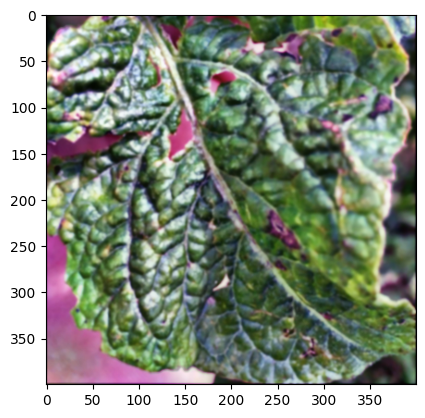

In [7]:
plt.imshow(x[150])

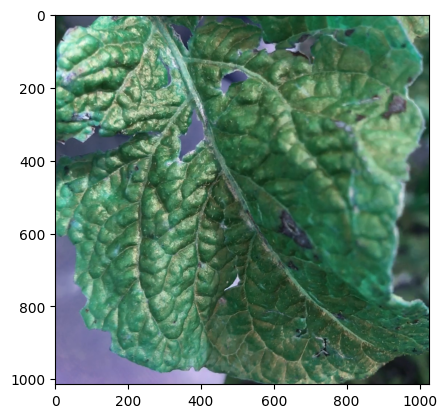

In [8]:
plt.imshow(z[150])

**Augmentation**

In [9]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/Preprocessed/'+ cls
    output_path = f'/content/drive/MyDrive/Insect/AugmentationImages/'+ cls

    target_size = 400

    # Augmentation parameters
    rotation_range = 30  # Rotation angle range in degrees
    scale_range = 0.2  # Scaling factor range

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Get the list of image files in the dataset directory
    image_files = [file for file in os.listdir(input_path) if file.endswith(".jpg") or file.endswith(".png")]

    # Shuffle the image files list
    np.random.shuffle(image_files)

    # Loop over each image file
    for file in image_files:
        if len(image_files) >= target_size:
            break

        # Read the image
        image_path = os.path.join(input_path, file)
        print(f"Reading image: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to read image: {image_path}")
            continue

        # Apply random augmentation
        for i in range(10):  # Generate 10 augmented versions for each image
            # Apply random rotation
            angle = np.random.uniform(-rotation_range, rotation_range)
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Apply random flipping
            flip_direction = np.random.randint(-1, 2)
            flipped_image = cv2.flip(rotated_image, flip_direction)

            # Apply random scaling
            scale_factor = np.random.uniform(1 - scale_range, 1 + scale_range)
            scaled_image = cv2.resize(flipped_image, None, fx=scale_factor, fy=scale_factor)

            # Apply random color transformation
            transformed_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2HSV)
            transformed_image[:, :, 2] = np.random.uniform(0.5, 1.5) * transformed_image[:, :, 2]
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_HSV2BGR)

            # Save augmented image
            augmented_file = f"augmented_{len(image_files)}.jpg"
            augmented_path = os.path.join(output_path, augmented_file)
            #cv2.imwrite(augmented_path, transformed_image)

            # Add augmented image to the list
            image_files.append(augmented_file)

            if len(image_files) >= target_size:
                break

        if len(image_files) % 50 == 0:
            print(f"Generated {len(image_files)} augmented images.")

print("Data augmentation complete!")

Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/164.jpg
Generated 200 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/89.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/20.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/103.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/156.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/91.jpg
Generated 250 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/107.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/136.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/151.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/86.jpg


**Segmentation**

**Background Remove**

In [28]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        # Save the processed image in the class-specific output directory
        output_file = os.path.join(output_path, f'{img_no}.jpg')
        cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Processing and saving complete!")

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 44.3GB/s]


Processing and saving complete!


**Show BgRemove Image**

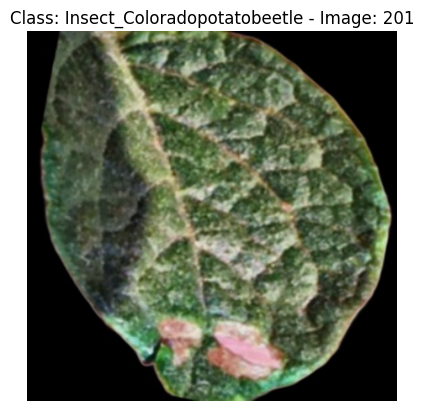

In [10]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display
cls = 'Insect_Coloradopotatobeetle'
img_num = 201  # Specify the image number

# Display the chosen image
show_image(cls, img_num)


**Canny Edge Detection, Thresholding, green mask without augmentation**

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/bgRemove/')
classes = {'Colorado':0, 'flea':1}

In [11]:
x=[]
y=[]
z=[]

save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgRemove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1) 

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)
        
        x.append(result)
        y.append(classes[cls])
        z.append(img)
 
  # Save the image in the specified folder
        #filename = os.path.join(save_folder, j)
        #cv2.imwrite(filename, result) 

**Canny Edge Detection, Thresholding, green mask with augmentation**

In [62]:
# path = os.listdir('/content/drive/MyDrive/Insect/bgremoveImagesNew/')
# classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

import os
path = os.listdir('/content/drive/MyDrive/Insect/bgRemove/')
classes = {'Colorado':0, 'flea':1}


In [63]:
# x=[]
# y=[]
# z=[]

# save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
# for cls in classes:
#     pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'+cls
#     for j in os.listdir(pth):
#         img = cv2.imread(pth+'/'+j,1) 

#         #Canny Edge Detection,identify the boundaries (edges) of objects,
#         edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
#         edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

#         # Thresholding segmentation method
#         gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
#         _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#         # Create a green mask with the same size as the image
#         mask = np.full_like(thresh, 255, dtype=np.uint8)

#         # Apply the mask to the image
#         result = cv2.bitwise_and(thresh, mask)
        
#         x.append(result)
#         y.append(classes[cls])
#         z.append(img)
 
  # Save the image in the specified folder
        #filename = os.path.join(save_folder, j)
        #cv2.imwrite(filename, result) 

################################ run this, after comment.because, here without augmentation 
x=[]
y=[]
z=[]

save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgRemove/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1) 

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        gray = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)
        
        x.append(result)
        y.append(classes[cls])
        z.append(img)
 
  # Save the image in the specified folder
        #filename = os.path.join(save_folder, j)
        #cv2.imwrite(filename, result) 

KeyboardInterrupt: ignored

**No of classes in the target**

In [12]:
np.unique(y)

array([0, 1])

In [13]:
x=np.array(x)
y=np.array(y)

In [14]:
#Prepare data
x_updated = x.reshape(len(x), -1)
x_updated.shape

(400, 160000)

In [ ]:
pd.Series(y). value_counts()

**Data Split (80/20 ratio)**

In [15]:
# Split dataset into random train and test subsets:
xtrain, xtest,ytrain,ytest = train_test_split(x_updated, y, random_state=10,test_size=20)

In [16]:
training_data = xtrain

In [18]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

**Feature Scalling**

In [19]:
#Feature Scalling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [20]:
xtrain.shape,xtest.shape

((380, 160000), (20, 160000))

In [21]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
X_train_std = sc.transform(xtrain)
X_test_std = sc.transform(xtest)

**Feature** **Extraction**

In [22]:
#feature extraction and dimensionality reduction
from sklearn.decomposition import PCA

In [23]:
import joblib
#Feature Selection : PCA
print(xtrain.shape, xtest.shape)
pca = PCA(n_components=0.98)
#pca_train = pca.fit_transform(X_train_std)
#pca_test = pca.transform(X_test_std)
pca_train=xtrain
pca_test=xtest

# Save the PCA object
joblib.dump(pca, '/content/drive/MyDrive/Insect/Insect Detection Model/new_pca1.pkl')

(380, 160000) (20, 160000)


['/content/drive/MyDrive/Insect/Insect Detection Model/new_pca1.pkl']

In [24]:
print(pca_train.shape, pca_test.shape) #op-380 samples and 160,000 features
#print(pca.n_components_)
#print(pca.n_features_)

(380, 160000) (20, 160000)


**Classification**

**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(pca_train, ytrain)

# Evaluate the model
print("K-Nearest Neighbors - Training Score:", knn.score(pca_train, ytrain))
print("K-Nearest Neighbors - Testing Score:", knn.score(pca_test, ytest))


K-Nearest Neighbors - Training Score: 0.8605263157894737
K-Nearest Neighbors - Testing Score: 0.75


**LogisticRegression**

In [26]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
#import warnings
#warnings.filterwarnings('ignore')

print("Training Score:",lg.score(pca_train,ytrain))
print("Testing Score:",lg.score(pca_test,ytest))

Training Score: 0.9789473684210527
Testing Score: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM**

In [27]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(pca_train, ytrain)

print("Training Score:",sv.score(pca_train,ytrain))
print("Testing Score:",sv.score(pca_test,ytest))

Training Score: 0.9394736842105263
Testing Score: 0.95


In [40]:
from sklearn.svm import SVC

# Create SVC model
sv = SVC()

# Flatten your PCA train and test data
pca_train_flattened = pca_train.reshape(pca_train.shape[0], -1)
pca_test_flattened = pca_test.reshape(pca_test.shape[0], -1)

# Fit the model on the flattened train data
sv.fit(pca_train_flattened, ytrain)

# Evaluate the model
train_score = sv.score(pca_train_flattened, ytrain)
test_score = sv.score(pca_test_flattened, ytest)

print("Training Score:", train_score)
print("Testing Score:", test_score)


Training Score: 0.9594423320659062
Testing Score: 0.9


**TestLabels CSV File**

In [ ]:
import pandas as pd

# Make predictions on the test data
predictions = sv.predict(pca_train)

# Create a DataFrame with the predicted labels
df = pd.DataFrame({'Label': ['colorado' if p == 0 else 'flea' for p in predictions]})

# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Insect/Insect Detection Model/svmpredictions.csv', index=False)

**Save** **Trained** **Model** - **SVM**

In [28]:
import joblib

# Save the trained model to Google Drive
joblib.dump(sv, '/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl')


['/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl']

**predict the labels for the test data**

ytest: The actual labels for the test data.

pred: The predicted labels obtained from the SVM model.

ytest != pred: This creates a boolean array of the same shape as ytest and pred, where True indicates a mismatch between the predicted and actual labels, and False indicates a match.

np.where(condition): This function returns the indices where the given condition is True. In this case, it returns the indices where ytest and pred do not match, i.e., the indices of misclassified samples.

In [30]:
pred=sv.predict(pca_test)
np.where(ytest!=pred)

(array([14]),)

In [31]:
pred[8]

0

In [32]:
ytest[8]

0

**Testing**

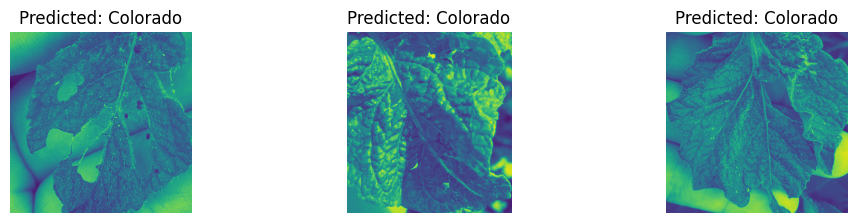

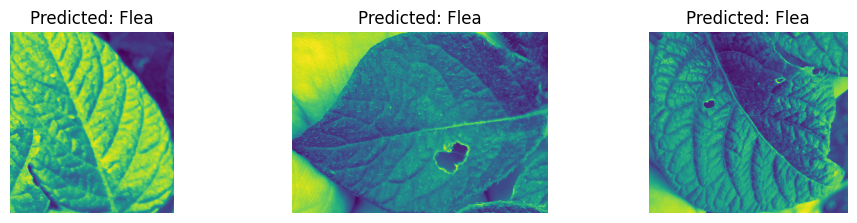

In [53]:
# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl')

# Define the class names
class_names = ['Colorado', 'Flea']

plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:3]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255
    
    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()

# Testing for Flea class
plt.figure(figsize=(12, 8))
c = 1

for i in os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:3]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/' + i, 0)
    img1 = cv2.resize(img, (400, 400))
    img2 = img1.reshape(1, -1) / 255

    # Define the class names
    class_names = ['Flea', 'Colorado']
    
    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()

**Evaluation**

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(ytrain, sv.predict(pca_train), average='weighted')
test_precision = precision_score(ytest, sv.predict(pca_test), average='weighted')

train_recall = recall_score(ytrain, sv.predict(pca_train), average='weighted')
test_recall = recall_score(ytest, sv.predict(pca_test), average='weighted')

train_f1 = f1_score(ytrain, sv.predict(pca_train), average='weighted')
test_f1 = f1_score(ytest, sv.predict(pca_test), average='weighted')

In [56]:
print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

Training Precision: 0.9407611008653709
Testing Precision: 0.9550000000000001
Training Recall: 0.9394736842105263
Testing Recall: 0.95
Training F1 Score: 0.9393203739089334
Testing F1 Score: 0.9501253132832079


In [55]:
from sklearn.metrics import classification_report

# Generate classification report on the testing data
classification_report_test = classification_report(ytest, sv.predict(pca_test), target_names=class_names)

In [57]:
print("Classification Report (Testing Data):")
print(classification_report_test)

Classification Report (Testing Data):
              precision    recall  f1-score   support

        Flea       1.00      0.91      0.95        11
    Colorado       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



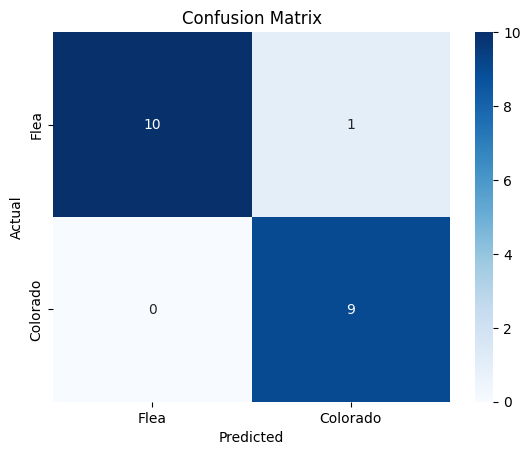

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate and visualize the confusion matrix on the testing data
cm = confusion_matrix(ytest, sv.predict(pca_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on the training and testing data
train_accuracy = accuracy_score(ytrain, sv.predict(pca_train))
test_accuracy = accuracy_score(ytest, sv.predict(pca_test))

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9394736842105263
Testing Accuracy: 0.95


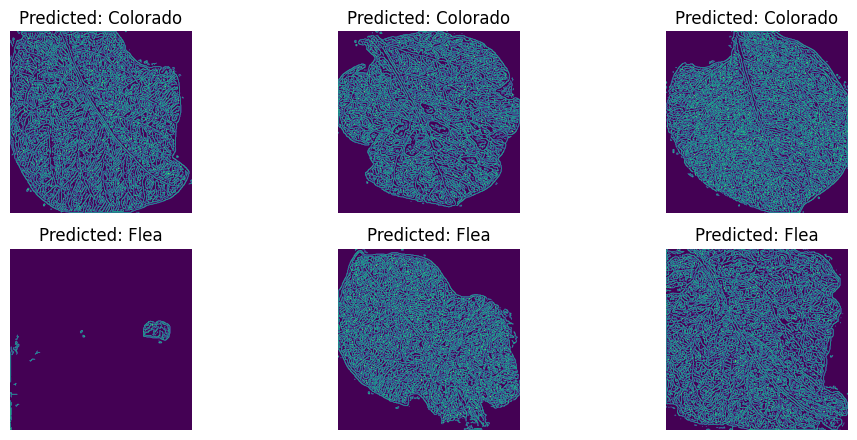

In [51]:
import random

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/newsvm_model.pkl')

# Define the class names
class_names = ['Flea', 'Colorado']

plt.figure(figsize=(12, 8))
c = 1

# Select random indices for each class
random_indices_flea = random.sample(range(len(xtest[ytest == 0])), 3)
random_indices_colorado = random.sample(range(len(xtest[ytest == 1])), 3)

# Plot random images for the 'Flea' class
for idx in random_indices_flea:
    plt.subplot(3, 3, c)
    
    img = xtest[ytest == 0][idx].reshape(400, 400)  # Reshape the image to (400, 400)
    
    # Make a prediction on the image
    pred = model.predict(img.flatten().reshape(1, -1) / 255)
    pred_class_name = class_names[pred[0]] 
    
    plt.imshow(img)  # Remove cmap='gray'
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1
class_names = ['Colorado', 'Flea']
# Plot random images for the 'Colorado' class
for idx in random_indices_colorado:
    plt.subplot(3, 3, c)
    
    img = xtest[ytest == 1][idx].reshape(400, 400)  # Reshape the image to (400, 400)
    
    # Make a prediction on the image
    pred = model.predict(img.flatten().reshape(1, -1) / 255)
    pred_class_name = class_names[pred[0]] 
    
    plt.imshow(img)  # Remove cmap='gray'
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()

**API** **Creation**

In [ ]:
pip install flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

app = Flask(__name__)
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/trained_model.pkl')
class_names = ['Colorado', 'Flea']
scaler = StandardScaler()
pca = PCA(.98)


FileNotFoundError: ignored

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image file found'})
    
    file = request.files['image']
    img = cv2.imdecode(np.fromstring(file.read(), np.uint8), cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, (400, 400))
    img_flattened = img_resized.reshape(1, -1)

    # Preprocess the image
    img_scaled = scaler.transform(img_flattened)
    img_pca = pca.transform(img_scaled)

    # Make a prediction
    pred = model.predict(img_pca)
    pred_class_name = class_names[pred[0]]

    return jsonify({'prediction': pred_class_name})


In [ ]:
@app.route('/accuracy', methods=['GET'])
def accuracy():
    # Calculate accuracy using the test set
    accuracy = model.score(pca_test, ytest)

    return jsonify({'accuracy': accuracy})


In [ ]:
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
